In [ ]:
# Carrega a biblioteca pandas e atribui um alias chamado "pd"
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import xgboost as xgb

# Métricas de avaliação de modelos
from sklearn import metrics
# Deixar colunas e linhas aparentes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Conexão com o Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregando os dados do arquivo CSV, especificando o separador decimal como vírgula
df = pd.read_csv("/content/drive/MyDrive/Tabelas - Projeto PCD/Colab/Tabelas/IndicIdadEduc_BR.xlsx.csv", decimal=",")

In [ ]:
df.head(5)

,Características selecionadas,População em idade de trabalhar_Com deficiência,População em idade de trabalhar_Sem deficiência,População na força de trabalho_ Com deficiência,População na força de trabalho_Sem deficiência,População ocupada\r\n_Com deficiência,População ocupada\r\n_Sem deficiência,População ocupada em trabalhos formais_Com deficiência,População ocupada em trabalhos formais_Sem deficiência,População desocupada\r\n_Com deficiência,População desocupada\r\n_Sem deficiência,Taxa de participação _Com deficiência,Taxa de participação _Sem deficiência,Nível de ocupação_Com deficiência,Nível de ocupação_Sem deficiência,Taxa de formalização_Com deficiência,Taxa de formalização_Sem deficiência,Taxa de desocupação_Com deficiência,Taxa de desocupação_Sem deficiência
0,Grupos de idade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14 a 29 anos,1 371,47 341,536,29 229,397,23 927,141.0,11 929,139.0,5 302,39.1,61.7,29.0,50.5,35.4,49.9,25.9,18.1
2,30 a 49 anos,3 580,58 175,1 885,49 183,1 685,46 150,699.0,25 538,199.0,3 033,52.6,84.5,47.1,79.3,41.5,55.3,10.6,6.2
3,50 a 59 anos,3 189,23 522,1 382,16 680,1 281,15 957,409.0,7 678,101.0,723,43.3,70.9,40.2,67.8,31.9,48.1,7.3,4.3
4,60 anos ou mais,8 534,25 865,910,7 661,863,7 465,201.0,2 479,46.0,196,10.7,29.6,10.1,28.9,23.3,33.2,5.1,2.6


In [ ]:
print(df.columns)

Index(['Características selecionadas',
       'População em idade de trabalhar_Com deficiência',
       'População em idade de trabalhar_Sem deficiência',
       'População na força de trabalho_ Com deficiência',
       'População na força de trabalho_Sem deficiência',
       'População ocupada\r\n_Com deficiência',
       'População ocupada\r\n_Sem deficiência',
       'População ocupada em trabalhos formais_Com deficiência',
       'População ocupada em trabalhos formais_Sem deficiência',
       'População desocupada\r\n_Com deficiência',
       'População desocupada\r\n_Sem deficiência',
       'Taxa de participação _Com deficiência',
       'Taxa de participação _Sem deficiência',
       'Nível de ocupação_Com deficiência',
       'Nível de ocupação_Sem deficiência',
       'Taxa de formalização_Com deficiência',
       'Taxa de formalização_Sem deficiência',
       'Taxa de desocupação_Com deficiência',
       'Taxa de desocupação_Sem deficiência'],
      dtype='object')


In [ ]:
#Pré-processamento de Dados

# Aplicando substituição da vírgula por nada
df = df.replace({',': ''}, regex=True)

# Mostrando informações do dataset
print("Informações do dataset:")
print(df.info())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Características selecionadas                            10 non-null     object 
 1   População em idade de trabalhar_Com deficiência         8 non-null      object 
 2   População em idade de trabalhar_Sem deficiência         8 non-null      object 
 3   População na força de trabalho_ Com deficiência         8 non-null      object 
 4   População na força de trabalho_Sem deficiência          8 non-null      object 
 5   População ocupada
_Com deficiência                     8 non-null      object 
 6   População ocupada
_Sem deficiência                     8 non-null      object 
 7   População ocupada em trabalhos formais_Com deficiência  8 non-null      float64
 8   População ocupada em 

In [ ]:
colunas_numericas = df.select_dtypes(include='number')
colunas_numericas.head()

,População ocupada em trabalhos formais_Com deficiência,População desocupada\r\n_Com deficiência,Taxa de participação _Com deficiência,Taxa de participação _Sem deficiência,Nível de ocupação_Com deficiência,Nível de ocupação_Sem deficiência,Taxa de formalização_Com deficiência,Taxa de formalização_Sem deficiência,Taxa de desocupação_Com deficiência,Taxa de desocupação_Sem deficiência
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141.0,139.0,39.1,61.7,29.0,50.5,35.4,49.9,25.9,18.1
2,699.0,199.0,52.6,84.5,47.1,79.3,41.5,55.3,10.6,6.2
3,409.0,101.0,43.3,70.9,40.2,67.8,31.9,48.1,7.3,4.3
4,201.0,46.0,10.7,29.6,10.1,28.9,23.3,33.2,5.1,2.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Características selecionadas                            10 non-null     object 
 1   População em idade de trabalhar_Com deficiência         8 non-null      object 
 2   População em idade de trabalhar_Sem deficiência         8 non-null      object 
 3   População na força de trabalho_ Com deficiência         8 non-null      object 
 4   População na força de trabalho_Sem deficiência          8 non-null      object 
 5   População ocupada
_Com deficiência                     8 non-null      object 
 6   População ocupada
_Sem deficiência                     8 non-null      object 
 7   População ocupada em trabalhos formais_Com deficiência  8 non-null      float64
 8   População ocupada em trabalhos formais_Sem de

In [ ]:
# Mostrando o número de linhas e colunas
print("\nNúmero de linhas e colunas:")
print("Linhas:", df.shape[0])
print("Colunas:", df.shape[1])


Número de linhas e colunas:
Linhas: 10
Colunas: 19


In [ ]:
# Mostrando as primeiras cinco linhas do dataset
print("\nPrimeiras cinco linhas do dataset:")
print(df.head())


Primeiras cinco linhas do dataset:
  Características selecionadas  \
0              Grupos de idade   
1                 14 a 29 anos   
2                 30 a 49 anos   
3                 50 a 59 anos   
4              60 anos ou mais   

  População em idade de trabalhar_Com deficiência  \
0                                             NaN   
1                                          1 371    
2                                          3 580    
3                                          3 189    
4                                          8 534    

  População em idade de trabalhar_Sem deficiência  \
0                                             NaN   
1                                         47 341    
2                                         58 175    
3                                         23 522    
4                                         25 865    

  População na força de trabalho_ Com deficiência  \
0                                             NaN   
1              

In [ ]:
# Mostrando as últimas cinco linhas do dataset
print("\nÚltimas cinco linhas do dataset:")
print(df.tail())


Últimas cinco linhas do dataset:
                      Características selecionadas  \
5                               Nível de instrução   
6          Sem instrução ou fundamental incompleto   
7  Ensino fundamental completo ou médio incompleto   
8     Ensino médio completo ou superior incompleto   
9                         Ensino superior completo   

  População em idade de trabalhar_Com deficiência  \
5                                             NaN   
6                                         11 196    
7                                          1 850    
8                                          2 723    
9                                            817    

  População em idade de trabalhar_Sem deficiência  \
5                                             NaN   
6                                         46 682    
7                                         27 340    
8                                         53 535    
9                                         24 282    

  P

In [ ]:
# Mostrando cinco amostras aleatórias do dataset
print("\nCinco amostras aleatórias do dataset:")
print(df.sample(5))


Cinco amostras aleatórias do dataset:
                      Características selecionadas  \
9                         Ensino superior completo   
2                                     30 a 49 anos   
0                                  Grupos de idade   
7  Ensino fundamental completo ou médio incompleto   
8     Ensino médio completo ou superior incompleto   

  População em idade de trabalhar_Com deficiência  \
9                                            817    
2                                          3 580    
0                                             NaN   
7                                          1 850    
8                                          2 723    

  População em idade de trabalhar_Sem deficiência  \
9                                         24 282    
2                                         58 175    
0                                             NaN   
7                                         27 340    
8                                         53 535    

In [ ]:
# Tipos de dados
print("\nTipos de dados:")
print(df.dtypes)


Tipos de dados:
Características selecionadas                               object
População em idade de trabalhar_Com deficiência            object
População em idade de trabalhar_Sem deficiência            object
População na força de trabalho_ Com deficiência            object
População na força de trabalho_Sem deficiência             object
População ocupada\r\n_Com deficiência                      object
População ocupada\r\n_Sem deficiência                      object
População ocupada em trabalhos formais_Com deficiência    float64
População ocupada em trabalhos formais_Sem deficiência     object
População desocupada\r\n_Com deficiência                  float64
População desocupada\r\n_Sem deficiência                   object
Taxa de participação _Com deficiência                     float64
Taxa de participação _Sem deficiência                     float64
Nível de ocupação_Com deficiência                         float64
Nível de ocupação_Sem deficiência                         f

#**População em idade de trabalhar [unidades de milhar]**

######**GRUPO DE IDADE**

In [ ]:
# Obtendo os valores grupos de idade Com e Sem Deficiência
idade1_com = int(df.loc[df['Características selecionadas'] == '14 a 29 anos', 'População em idade de trabalhar_Com deficiência'].values[0].replace(" ", ""))
idade2_com = int(df.loc[df['Características selecionadas'] == '30 a 49 anos', 'População em idade de trabalhar_Com deficiência'].values[0].replace(" ", ""))
idade3_com = int(df.loc[df['Características selecionadas'] == '50 a 59 anos', 'População em idade de trabalhar_Com deficiência'].values[0].replace(" ", ""))
idade4_com = int(df.loc[df['Características selecionadas'] == '60 anos ou mais', 'População em idade de trabalhar_Com deficiência'].values[0].replace(" ", ""))
idade1_sem = int(df.loc[df['Características selecionadas'] == '14 a 29 anos', 'População em idade de trabalhar_Sem deficiência'].values[0].replace(" ", ""))
idade2_sem = int(df.loc[df['Características selecionadas'] == '30 a 49 anos', 'População em idade de trabalhar_Sem deficiência'].values[0].replace(" ", ""))
idade3_sem = int(df.loc[df['Características selecionadas'] == '50 a 59 anos', 'População em idade de trabalhar_Sem deficiência'].values[0].replace(" ", ""))
idade4_sem = int(df.loc[df['Características selecionadas'] == '60 anos ou mais', 'População em idade de trabalhar_Sem deficiência'].values[0].replace(" ", ""))


# Calculando a diferença numérica
diferenca_numerica_fisica_1_ = idade1_com - idade1_sem
diferenca_numerica_fisica_2_ = idade2_com - idade2_sem
diferenca_numerica_fisica_3_ = idade3_com - idade3_sem
diferenca_numerica_fisica_4_ = idade2_com - idade4_sem

# Exibindo os valores e a diferença numérica
print("{} população 14 a 29 anos possui deficiência e tem idade para Trabalhar.".format(idade1_com))
print("{} população 30 a 49 anos possui deficiência e tem idade para Trabalhar.".format(idade2_com))
print("{} população 50 a 59 anos possui deficiência e tem idade para Trabalhar.".format(idade3_com))
print("{} população 60 anos ou mais possui deficiência e tem idade para Trabalhar.".format(idade4_com))
print("{} população 14 a 29 anos possui deficiência e tem idade para Trabalhar.".format(idade1_sem))
print("{} população 30 a 49 anos possui deficiência e tem idade para Trabalhar.".format(idade2_sem))
print("{} população 50 a 59 anos possui deficiência e tem idade para Trabalhar.".format(idade3_sem))
print("{} população 60 anos ou mais possui deficiência e tem idade para Trabalhar.".format(idade4_sem))

print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 14 a 29 anos que possuem idade para trabalhar é de {} ".format(diferenca_numerica_fisica_1_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 30 a 49 anos que possuem idade para trabalhar é de {} ".format(diferenca_numerica_fisica_2_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 50 a 59 anos que possuem idade para trabalhar é de {} ".format(diferenca_numerica_fisica_3_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 60 anos ou mais que possuem idade para trabalhar é de {} ".format(diferenca_numerica_fisica_4_))


1371 população 14 a 29 anos possui deficiência e tem idade para Trabalhar.
3580 população 30 a 49 anos possui deficiência e tem idade para Trabalhar.
3189 população 50 a 59 anos possui deficiência e tem idade para Trabalhar.
8534 população 60 anos ou mais possui deficiência e tem idade para Trabalhar.
47341 população 14 a 29 anos possui deficiência e tem idade para Trabalhar.
58175 população 30 a 49 anos possui deficiência e tem idade para Trabalhar.
23522 população 50 a 59 anos possui deficiência e tem idade para Trabalhar.
25865 população 60 anos ou mais possui deficiência e tem idade para Trabalhar.
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 14 a 29 anos que possuem idade para trabalhar é de -45970 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 30 a 49 anos que possuem idade para trabalhar é de -54595 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 50 a 59 anos que possuem idade p

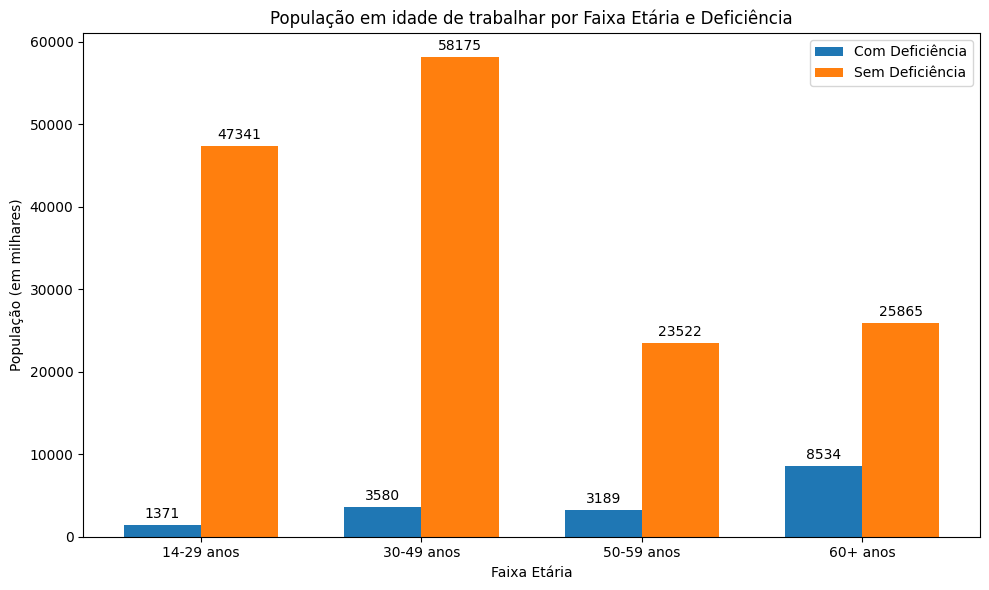

In [ ]:
# Definindo os dados
idades = ['14-29 anos', '30-49 anos', '50-59 anos', '60+ anos']  # Faixas etárias
pop_com_deficiencia = [idade1_com, idade2_com, idade3_com, idade4_com]  # População com deficiência por faixa etária
pop_sem_deficiencia = [idade1_sem, idade2_sem, idade3_sem, idade4_sem]  # População sem deficiência por faixa etária

# Criando o índice para as barras
x = np.arange(len(idades))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_com = ax.bar(x - width/2, pop_com_deficiencia, width, label='Com Deficiência')
barras_sem = ax.bar(x + width/2, pop_sem_deficiencia, width, label='Sem Deficiência')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('População (em milhares)')
ax.set_title('População em idade de trabalhar por Faixa Etária e Deficiência')
ax.set_xticks(x)
ax.set_xticklabels(idades)
ax.legend()

# Adicionando os valores em cima das barras
def autolabel(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate('{}'.format(altura),
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barras_com)
autolabel(barras_sem)

plt.tight_layout()
plt.show()

######**NIVEL DE INSTRUÇÃO**

In [ ]:
# Obtendo os valores grupos de idade Com e Sem Deficiência
Sinstrucao_com = int(df.loc[df['Características selecionadas'] == 'Sem instrução ou fundamental incompleto', 'População em idade de trabalhar_Com deficiência'].values[0].replace(" ", ""))
EnsinoFund_com = int(df.loc[df['Características selecionadas'] == 'Ensino fundamental completo ou médio incompleto', 'População em idade de trabalhar_Com deficiência'].values[0].replace(" ", ""))
EnsinoMed_com = int(df.loc[df['Características selecionadas'] == 'Ensino médio completo ou superior incompleto', 'População em idade de trabalhar_Com deficiência'].values[0].replace(" ", ""))
EnsinoSup_com = int(df.loc[df['Características selecionadas'] == 'Ensino superior completo', 'População em idade de trabalhar_Com deficiência'].values[0].replace(" ", ""))
Sinstrucao_sem = int(df.loc[df['Características selecionadas'] == 'Sem instrução ou fundamental incompleto', 'População em idade de trabalhar_Sem deficiência'].values[0].replace(" ", ""))
EnsinoFund_sem = int(df.loc[df['Características selecionadas'] == 'Ensino fundamental completo ou médio incompleto', 'População em idade de trabalhar_Sem deficiência'].values[0].replace(" ", ""))
EnsinoMed_sem = int(df.loc[df['Características selecionadas'] == 'Ensino médio completo ou superior incompleto', 'População em idade de trabalhar_Sem deficiência'].values[0].replace(" ", ""))
EnsinoSup_sem = int(df.loc[df['Características selecionadas'] == 'Ensino superior completo', 'População em idade de trabalhar_Sem deficiência'].values[0].replace(" ", ""))


# Calculando a diferença numérica
diferenca_numerica_fisica_1_ = Sinstrucao_com - Sinstrucao_sem
diferenca_numerica_fisica_2_ = EnsinoFund_com - EnsinoFund_sem
diferenca_numerica_fisica_3_ = EnsinoMed_com - EnsinoMed_sem
diferenca_numerica_fisica_4_ = EnsinoSup_com - EnsinoSup_sem

# Exibindo os valores e a diferença numérica
print("{} população Sem instrução ou fundamental incompleto possui deficiência e tem idade para Trabalhar.".format(Sinstrucao_com))
print("{} população Ensino fundamental completo ou médio incompleto possui deficiência e tem idade para Trabalhar.".format(EnsinoFund_com))
print("{} população Ensino médio completo ou superior incompleto possui deficiência e tem idade para Trabalhar.".format(EnsinoMed_com))
print("{} população Ensino superior completo possui deficiência e tem idade para Trabalhar.".format(EnsinoSup_com))
print("{} população Sem instrução ou fundamental incompleto possui deficiência e tem idade para Trabalhar.".format(Sinstrucao_sem))
print("{} população Ensino fundamental completo ou médio incompleto possui deficiência e tem idade para Trabalhar.".format(EnsinoFund_sem))
print("{} população Ensino médio completo ou superior incompleto possui deficiência e tem idade para Trabalhar.".format(EnsinoMed_sem))
print("{} população Ensino superior completo possui deficiência e tem idade para Trabalhar.".format(EnsinoSup_sem))

print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 14 a 29 anos que possuem idade para trabalhar é de {} ".format(diferenca_numerica_fisica_1_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 30 a 49 anos que possuem idade para trabalhar é de {} ".format(diferenca_numerica_fisica_2_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 50 a 59 anos que possuem idade para trabalhar é de {} ".format(diferenca_numerica_fisica_3_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 60 anos ou mais que possuem idade para trabalhar é de {} ".format(diferenca_numerica_fisica_4_))


11196 população Sem instrução ou fundamental incompleto possui deficiência e tem idade para Trabalhar.
1850 população Ensino fundamental completo ou médio incompleto possui deficiência e tem idade para Trabalhar.
2723 população Ensino médio completo ou superior incompleto possui deficiência e tem idade para Trabalhar.
817 população Ensino superior completo possui deficiência e tem idade para Trabalhar.
46682 população Sem instrução ou fundamental incompleto possui deficiência e tem idade para Trabalhar.
27340 população Ensino fundamental completo ou médio incompleto possui deficiência e tem idade para Trabalhar.
53535 população Ensino médio completo ou superior incompleto possui deficiência e tem idade para Trabalhar.
24282 população Ensino superior completo possui deficiência e tem idade para Trabalhar.
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 14 a 29 anos que possuem idade para trabalhar é de -35486 
A diferença numérica entre pessoas com defici

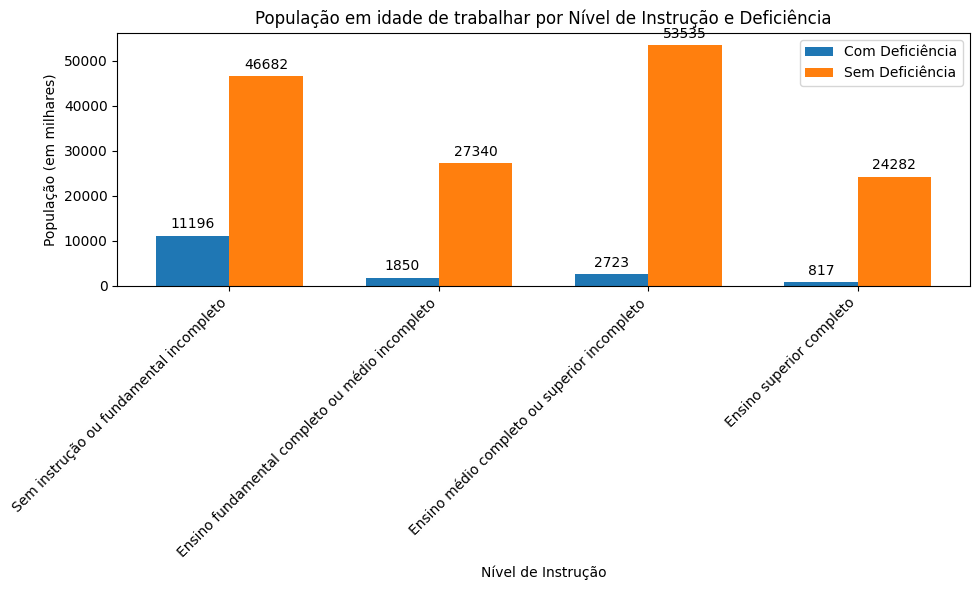

In [ ]:
# Definindo os dados
niveis_instrucao = ['Sem instrução ou fundamental incompleto', 'Ensino fundamental completo ou médio incompleto',
                    'Ensino médio completo ou superior incompleto', 'Ensino superior completo']
pop_com_deficiencia = [Sinstrucao_com, EnsinoFund_com, EnsinoMed_com, EnsinoSup_com]  # População com deficiência por nível de instrução
pop_sem_deficiencia = [Sinstrucao_sem, EnsinoFund_sem, EnsinoMed_sem, EnsinoSup_sem]  # População sem deficiência por nível de instrução

# Criando o índice para as barras
x = np.arange(len(niveis_instrucao))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_com = ax.bar(x - width/2, pop_com_deficiencia, width, label='Com Deficiência')
barras_sem = ax.bar(x + width/2, pop_sem_deficiencia, width, label='Sem Deficiência')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Nível de Instrução')
ax.set_ylabel('População (em milhares)')
ax.set_title('População em idade de trabalhar por Nível de Instrução e Deficiência')
ax.set_xticks(x)
ax.set_xticklabels(niveis_instrucao, rotation=45, ha='right')
ax.legend()

# Adicionando os valores em cima das barras
def autolabel(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate('{}'.format(altura),
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barras_com)
autolabel(barras_sem)

plt.tight_layout()
plt.show()

#**População na força de trabalho**

######**GRUPO DE IDADE**

In [ ]:
# Obtendo os valores grupos de idade Com e Sem Deficiência
idade1_com_1_ = int(df.loc[df['Características selecionadas'] == '14 a 29 anos', 'População na força de trabalho_ Com deficiência'].values[0].replace(" ", ""))
idade2_com_1_ = int(df.loc[df['Características selecionadas'] == '30 a 49 anos', 'População na força de trabalho_ Com deficiência'].values[0].replace(" ", ""))
idade3_com_1_ = int(df.loc[df['Características selecionadas'] == '50 a 59 anos', 'População na força de trabalho_ Com deficiência'].values[0].replace(" ", ""))
idade4_com_1_ = int(df.loc[df['Características selecionadas'] == '60 anos ou mais', 'População na força de trabalho_ Com deficiência'].values[0].replace(" ", ""))
idade1_sem_1_ = int(df.loc[df['Características selecionadas'] == '14 a 29 anos', 'População na força de trabalho_Sem deficiência'].values[0].replace(" ", ""))
idade2_sem_1_ = int(df.loc[df['Características selecionadas'] == '30 a 49 anos', 'População na força de trabalho_Sem deficiência'].values[0].replace(" ", ""))
idade3_sem_1_ = int(df.loc[df['Características selecionadas'] == '50 a 59 anos', 'População na força de trabalho_Sem deficiência'].values[0].replace(" ", ""))
idade4_sem_1_ = int(df.loc[df['Características selecionadas'] == '60 anos ou mais', 'População na força de trabalho_Sem deficiência'].values[0].replace(" ", ""))


# Calculando a diferença numérica
diferenca_numerica_fisica_1__1_ = idade1_com_1_ - idade1_sem_1_
diferenca_numerica_fisica_2__1_ = idade2_com_1_ - idade2_sem_1_
diferenca_numerica_fisica_3__1_ = idade3_com_1_ - idade3_sem_1_
diferenca_numerica_fisica_4__1_ = idade2_com_1_ - idade4_sem_1_

# Exibindo os valores e a diferença numérica
print("{} população 14 a 29 anos possui deficiência e está na força de trabalho.".format(idade1_com_1_))
print("{} população 30 a 49 anos possui deficiência e está na força de trabalho.".format(idade2_com_1_))
print("{} população 50 a 59 anos possui deficiência e está na força de trabalho.".format(idade3_com_1_))
print("{} população 60 anos ou mais possui deficiência e está na força de trabalho.".format(idade4_com_1_))
print("{} população 14 a 29 anos possui deficiência e está na força de trabalho.".format(idade1_sem_1_))
print("{} população 30 a 49 anos possui deficiência e está na força de trabalho.".format(idade2_sem_1_))
print("{} população 50 a 59 anos possui deficiência e está na força de trabalho.".format(idade3_sem_1_))
print("{} população 60 anos ou mais possui deficiência e está na força de trabalho.".format(idade4_sem_1_))

print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 14 a 29 anos que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_1__1_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 30 a 49 anos que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_2__1_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 50 a 59 anos que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_3__1_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 60 anos ou mais que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_4__1_))


536 população 14 a 29 anos possui deficiência e está na força de trabalho.
1885 população 30 a 49 anos possui deficiência e está na força de trabalho.
1382 população 50 a 59 anos possui deficiência e está na força de trabalho.
910 população 60 anos ou mais possui deficiência e está na força de trabalho.
29229 população 14 a 29 anos possui deficiência e está na força de trabalho.
49183 população 30 a 49 anos possui deficiência e está na força de trabalho.
16680 população 50 a 59 anos possui deficiência e está na força de trabalho.
7661 população 60 anos ou mais possui deficiência e está na força de trabalho.
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 14 a 29 anos que estão na força de trabalho é de -28693 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 30 a 49 anos que estão na força de trabalho é de -47298 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 50 a 59 anos que estão na força

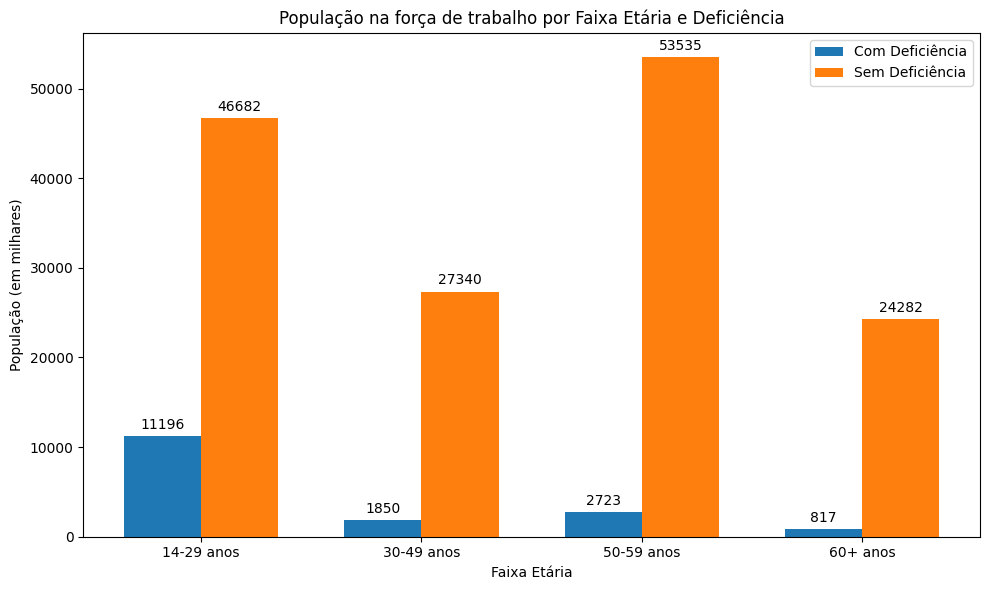

In [ ]:
# Definindo os dados
idades_1_ = ['14-29 anos', '30-49 anos', '50-59 anos', '60+ anos']  # Faixas etárias
pop_com_deficiencia_1_ = [idade1_com_1_, idade2_com_1_, idade3_com_1_, idade4_com_1_]  # População com deficiência por faixa etária
pop_sem_deficiencia_1_ = [idade1_sem_1_, idade2_sem_1_, idade3_sem_1_, idade4_sem_1_]  # População sem deficiência por faixa etária

# Criando o índice para as barras
x = np.arange(len(idades))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_com = ax.bar(x - width/2, pop_com_deficiencia, width, label='Com Deficiência')
barras_sem = ax.bar(x + width/2, pop_sem_deficiencia, width, label='Sem Deficiência')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('População (em milhares)')
ax.set_title('População na força de trabalho por Faixa Etária e Deficiência')
ax.set_xticks(x)
ax.set_xticklabels(idades)
ax.legend()

# Adicionando os valores em cima das barras
def autolabel(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate('{}'.format(altura),
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barras_com)
autolabel(barras_sem)

plt.tight_layout()
plt.show()

######**NIVEL DE INSTRUÇÃO**

In [ ]:
# Obtendo os valores grupos de idade Com e Sem Deficiência
Sinstrucao_com_1_ = int(df.loc[df['Características selecionadas'] == 'Sem instrução ou fundamental incompleto', 'População na força de trabalho_ Com deficiência'].values[0].replace(" ", ""))
EnsinoFund_com_1_ = int(df.loc[df['Características selecionadas'] == 'Ensino fundamental completo ou médio incompleto', 'População na força de trabalho_ Com deficiência'].values[0].replace(" ", ""))
EnsinoMed_com_1_ = int(df.loc[df['Características selecionadas'] == 'Ensino médio completo ou superior incompleto', 'População na força de trabalho_ Com deficiência'].values[0].replace(" ", ""))
EnsinoSup_com_1_ = int(df.loc[df['Características selecionadas'] == 'Ensino superior completo', 'População na força de trabalho_ Com deficiência'].values[0].replace(" ", ""))
Sinstrucao_sem_1_ = int(df.loc[df['Características selecionadas'] == 'Sem instrução ou fundamental incompleto', 'População na força de trabalho_Sem deficiência'].values[0].replace(" ", ""))
EnsinoFund_sem_1_ = int(df.loc[df['Características selecionadas'] == 'Ensino fundamental completo ou médio incompleto', 'População na força de trabalho_Sem deficiência'].values[0].replace(" ", ""))
EnsinoMed_sem_1_ = int(df.loc[df['Características selecionadas'] == 'Ensino médio completo ou superior incompleto', 'População na força de trabalho_Sem deficiência'].values[0].replace(" ", ""))
EnsinoSup_sem_1_ = int(df.loc[df['Características selecionadas'] == 'Ensino superior completo', 'População na força de trabalho_Sem deficiência'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_1_ = Sinstrucao_com_1_ - Sinstrucao_sem_1_
diferenca_numerica_fisica_2_ = EnsinoFund_com_1_ - EnsinoFund_sem_1_
diferenca_numerica_fisica_3_ = EnsinoMed_com_1_ - EnsinoMed_sem_1_
diferenca_numerica_fisica_4_ = EnsinoSup_com_1_ - EnsinoSup_sem_1_

# Exibindo os valores e a diferença numérica
print("{} população Sem instrução ou fundamental incompleto possui deficiência e está na força de trabalho.".format(Sinstrucao_com_1_))
print("{} população Ensino fundamental completo ou médio incompleto possui deficiência e está na força de trabalho.".format(EnsinoFund_com_1_))
print("{} população Ensino médio completo ou superior incompleto possui deficiência e está na força de trabalho.".format(EnsinoMed_com_1_))
print("{} população Ensino superior completo possui deficiência e está na força de trabalho.".format(EnsinoSup_com_1_))
print("{} população Sem instrução ou fundamental incompleto possui deficiência e está na força de trabalho.".format(Sinstrucao_sem_1_))
print("{} população Ensino fundamental completo ou médio incompleto possui deficiência e está na força de trabalho.".format(EnsinoFund_sem_1_))
print("{} população Ensino médio completo ou superior incompleto possui deficiência e está na força de trabalho.".format(EnsinoMed_sem_1_))
print("{} população Ensino superior completo possui deficiência e está na força de trabalho.".format(EnsinoSup_sem_1_))

print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Sem instrução ou fundamental incompleto que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_1_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino fundamental completo ou médio incompleto que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_2_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino médio completo ou superior incompleto que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_3_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino superior completo que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_4_))


2276 população Sem instrução ou fundamental incompleto possui deficiência e está na força de trabalho.
724 população Ensino fundamental completo ou médio incompleto possui deficiência e está na força de trabalho.
1313 população Ensino médio completo ou superior incompleto possui deficiência e está na força de trabalho.
393 população Ensino superior completo possui deficiência e está na força de trabalho.
24689 população Sem instrução ou fundamental incompleto possui deficiência e está na força de trabalho.
16228 população Ensino fundamental completo ou médio incompleto possui deficiência e está na força de trabalho.
41287 população Ensino médio completo ou superior incompleto possui deficiência e está na força de trabalho.
20317 população Ensino superior completo possui deficiência e está na força de trabalho.
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Sem instrução ou fundamental incompleto que estão na força de trabalho é de -22413 
A diferença nu

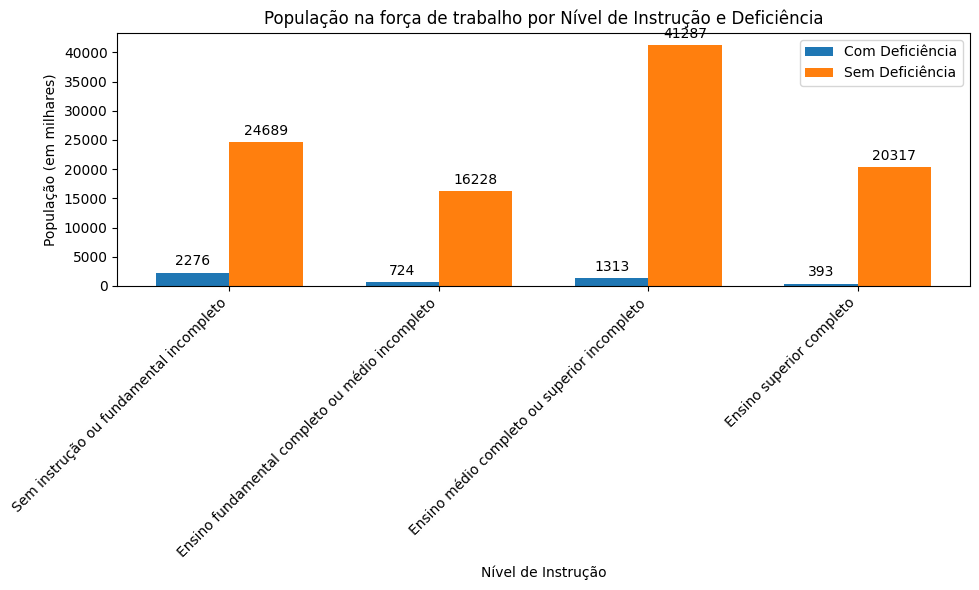

In [ ]:
# Definindo os dados
niveis_instrucao_1_ = ['Sem instrução ou fundamental incompleto', 'Ensino fundamental completo ou médio incompleto',
                    'Ensino médio completo ou superior incompleto', 'Ensino superior completo']
pop_com_deficiencia_1_ = [Sinstrucao_com_1_, EnsinoFund_com_1_, EnsinoMed_com_1_, EnsinoSup_com_1_]  # População com deficiência por nível de instrução
pop_sem_deficiencia_1_ = [Sinstrucao_sem_1_, EnsinoFund_sem_1_, EnsinoMed_sem_1_, EnsinoSup_sem_1_]  # População sem deficiência por nível de instrução

# Criando o índice para as barras
x_1_ = np.arange(len(niveis_instrucao_1_))

# Largura das barras
width_1_ = 0.35

# Criando o gráfico de barras
fig_1_, ax_1_ = plt.subplots(figsize=(10, 6))
barras_com_1_ = ax_1_.bar(x_1_ - width_1_/2, pop_com_deficiencia_1_, width_1_, label='Com Deficiência')
barras_sem_1_ = ax_1_.bar(x_1_ + width_1_/2, pop_sem_deficiencia_1_, width_1_, label='Sem Deficiência')

# Adicionando rótulos, título e legenda
ax_1_.set_xlabel('Nível de Instrução')
ax_1_.set_ylabel('População (em milhares)')
ax_1_.set_title('População na força de trabalho por Nível de Instrução e Deficiência')
ax_1_.set_xticks(x_1_)
ax_1_.set_xticklabels(niveis_instrucao_1_, rotation=45, ha='right')
ax_1_.legend()

# Adicionando os valores em cima das barras
def autolabel(barras):
    for barra in barras:
        altura = barra.get_height()
        ax_1_.annotate('{}'.format(altura),
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barras_com_1_)
autolabel(barras_sem_1_)

plt.tight_layout()
plt.show()

#**População Ocupada**

######**GRUPO DE IDADE**

In [ ]:
# Obtendo os valores grupos de idade Com e Sem Deficiência
idade1_com_2_ = int(df.loc[df['Características selecionadas'] == '14 a 29 anos', 'População ocupada\r\n_Com deficiência'].values[0].replace(" ", ""))
idade2_com_2_ = int(df.loc[df['Características selecionadas'] == '30 a 49 anos', 'População ocupada\r\n_Com deficiência'].values[0].replace(" ", ""))
idade3_com_2_ = int(df.loc[df['Características selecionadas'] == '50 a 59 anos', 'População ocupada\r\n_Com deficiência'].values[0].replace(" ", ""))
idade4_com_2_ = int(df.loc[df['Características selecionadas'] == '60 anos ou mais', 'População ocupada\r\n_Com deficiência'].values[0].replace(" ", ""))
idade1_sem_2_ = int(df.loc[df['Características selecionadas'] == '14 a 29 anos', 'População ocupada\r\n_Sem deficiência'].values[0].replace(" ", ""))
idade2_sem_2_ = int(df.loc[df['Características selecionadas'] == '30 a 49 anos', 'População ocupada\r\n_Sem deficiência'].values[0].replace(" ", ""))
idade3_sem_2_ = int(df.loc[df['Características selecionadas'] == '50 a 59 anos', 'População ocupada\r\n_Sem deficiência'].values[0].replace(" ", ""))
idade4_sem_2_ = int(df.loc[df['Características selecionadas'] == '60 anos ou mais', 'População ocupada\r\n_Sem deficiência'].values[0].replace(" ", ""))


# Calculando a diferença numérica
diferenca_numerica_fisica_1__2_ = idade1_com_2_ - idade1_sem_2_
diferenca_numerica_fisica_2__2_ = idade2_com_2_ - idade2_sem_2_
diferenca_numerica_fisica_3__2_ = idade3_com_2_ - idade3_sem_2_
diferenca_numerica_fisica_4__2_ = idade2_com_2_ - idade4_sem_2_

# Exibindo os valores e a diferença numérica
print("{} população 14 a 29 anos possui deficiência e está ocupada.".format(idade1_com_2_))
print("{} população 30 a 49 anos possui deficiência e está ocupada.".format(idade2_com_2_))
print("{} população 50 a 59 anos possui deficiência e está ocupada.".format(idade3_com_2_))
print("{} população 60 anos ou mais possui deficiência e está ocupada.".format(idade4_com_2_))
print("{} população 14 a 29 anos possui deficiência e está ocupada.".format(idade1_sem_2_))
print("{} população 30 a 49 anos possui deficiência e está ocupada.".format(idade2_sem_2_))
print("{} população 50 a 59 anos possui deficiência e está ocupada.".format(idade3_sem_2_))
print("{} população 60 anos ou mais possui deficiência e está ocupada.".format(idade4_sem_2_))

print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 14 a 29 anos que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_1__2_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 30 a 49 anos que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_2__2_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 50 a 59 anos que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_3__2_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 60 anos ou mais que estão na força de trabalho é de {} ".format(diferenca_numerica_fisica_4__2_))

397 população 14 a 29 anos possui deficiência e está ocupada.
1685 população 30 a 49 anos possui deficiência e está ocupada.
1281 população 50 a 59 anos possui deficiência e está ocupada.
863 população 60 anos ou mais possui deficiência e está ocupada.
23927 população 14 a 29 anos possui deficiência e está ocupada.
46150 população 30 a 49 anos possui deficiência e está ocupada.
15957 população 50 a 59 anos possui deficiência e está ocupada.
7465 população 60 anos ou mais possui deficiência e está ocupada.
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 14 a 29 anos que estão na força de trabalho é de -23530 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 30 a 49 anos que estão na força de trabalho é de -44465 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 50 a 59 anos que estão na força de trabalho é de -14676 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência d

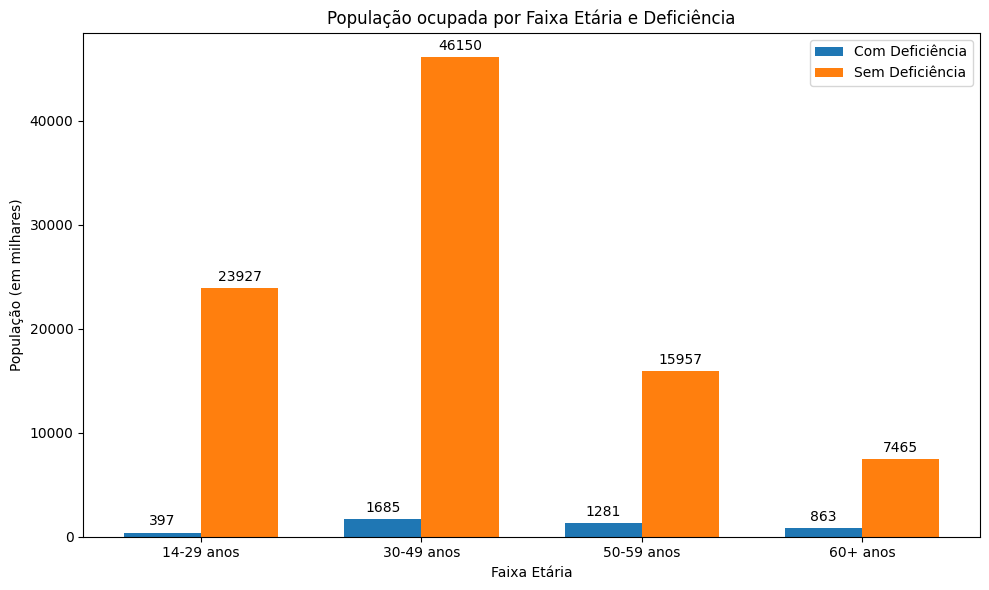

In [ ]:
# Definindo os dados
idades_2_ = ['14-29 anos', '30-49 anos', '50-59 anos', '60+ anos']  # Faixas etárias
pop_com_deficiencia_2_ = [idade1_com_2_, idade2_com_2_, idade3_com_2_, idade4_com_2_]  # População com deficiência por faixa etária
pop_sem_deficiencia_2_ = [idade1_sem_2_, idade2_sem_2_, idade3_sem_2_, idade4_sem_2_]  # População sem deficiência por faixa etária

# Criando o índice para as barras
x_2_ = np.arange(len(idades_2_))

# Largura das barras
width_2_ = 0.35

# Criando o gráfico de barras
fig_2_, ax_2_ = plt.subplots(figsize=(10, 6))
barras_com_2_ = ax_2_.bar(x_2_ - width_2_/2, pop_com_deficiencia_2_, width_2_, label='Com Deficiência')
barras_sem_2_ = ax_2_.bar(x_2_ + width_2_/2, pop_sem_deficiencia_2_, width_2_, label='Sem Deficiência')

# Adicionando rótulos, título e legenda
ax_2_.set_xlabel('Faixa Etária')
ax_2_.set_ylabel('População (em milhares)')
ax_2_.set_title('População ocupada por Faixa Etária e Deficiência')
ax_2_.set_xticks(x_2_)
ax_2_.set_xticklabels(idades_2_)
ax_2_.legend()

# Adicionando os valores em cima das barras
def autolabel(barras):
    for barra in barras:
        altura = barra.get_height()
        ax_2_.annotate('{}'.format(altura),
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barras_com_2_)
autolabel(barras_sem_2_)

plt.tight_layout()
plt.show()

######**NIVEL DE INSTRUÇÃO**

In [ ]:
# Obtendo os valores grupos de idade Com e Sem Deficiência
Sinstrucao_com_2_ = int(df.loc[df['Características selecionadas'] == 'Sem instrução ou fundamental incompleto', 'População ocupada\r\n_Com deficiência'].values[0].replace(" ", ""))
EnsinoFund_com_2_ = int(df.loc[df['Características selecionadas'] == 'Ensino fundamental completo ou médio incompleto', 'População ocupada\r\n_Com deficiência'].values[0].replace(" ", ""))
EnsinoMed_com_2_ = int(df.loc[df['Características selecionadas'] == 'Ensino médio completo ou superior incompleto', 'População ocupada\r\n_Com deficiência'].values[0].replace(" ", ""))
EnsinoSup_com_2_ = int(df.loc[df['Características selecionadas'] == 'Ensino superior completo', 'População ocupada\r\n_Com deficiência'].values[0].replace(" ", ""))
Sinstrucao_sem_2_ = int(df.loc[df['Características selecionadas'] == 'Sem instrução ou fundamental incompleto', 'População ocupada\r\n_Sem deficiência'].values[0].replace(" ", ""))
EnsinoFund_sem_2_ = int(df.loc[df['Características selecionadas'] == 'Ensino fundamental completo ou médio incompleto', 'População ocupada\r\n_Sem deficiência'].values[0].replace(" ", ""))
EnsinoMed_sem_2_ = int(df.loc[df['Características selecionadas'] == 'Ensino médio completo ou superior incompleto', 'População ocupada\r\n_Sem deficiência'].values[0].replace(" ", ""))
EnsinoSup_sem_2_ = int(df.loc[df['Características selecionadas'] == 'Ensino superior completo', 'População ocupada\r\n_Sem deficiência'].values[0].replace(" ", ""))

# Calculando a diferença numérica
diferenca_numerica_fisica_1_ = Sinstrucao_com_2_ - Sinstrucao_sem_2_
diferenca_numerica_fisica_2_ = EnsinoFund_com_2_ - EnsinoFund_sem_2_
diferenca_numerica_fisica_3_ = EnsinoMed_com_2_ - EnsinoMed_sem_2_
diferenca_numerica_fisica_4_ = EnsinoSup_com_2_ - EnsinoSup_sem_2_

# Exibindo os valores e a diferença numérica
print("{} população Sem instrução ou fundamental incompleto possui deficiência e está ocupada.".format(Sinstrucao_com_2_))
print("{} população Ensino fundamental completo ou médio incompleto possui deficiência e está ocupada.".format(EnsinoFund_com_2_))
print("{} população Ensino médio completo ou superior incompleto possui deficiência e está ocupada.".format(EnsinoMed_com_2_))
print("{} população Ensino superior completo possui deficiência e está ocupada.".format(EnsinoSup_com_2_))
print("{} população Sem instrução ou fundamental incompleto possui deficiência e está ocupada.".format(Sinstrucao_sem_2_))
print("{} população Ensino fundamental completo ou médio incompleto possui deficiência e está ocupada.".format(EnsinoFund_sem_2_))
print("{} população Ensino médio completo ou superior incompleto possui deficiência e está ocupada.".format(EnsinoMed_sem_2_))
print("{} população Ensino superior completo possui deficiência e está ocupada.".format(EnsinoSup_sem_2_))

print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Sem instrução ou fundamental incompleto que estão ocupadas é de {} ".format(diferenca_numerica_fisica_1_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino fundamental completo ou médio incompleto que estão ocupadas é de {} ".format(diferenca_numerica_fisica_2_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino médio completo ou superior incompleto que estão ocupadas é de {} ".format(diferenca_numerica_fisica_3_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino superior completo que estão ocupadas é de {} ".format(diferenca_numerica_fisica_4_))

2087 população Sem instrução ou fundamental incompleto possui deficiência e está ocupada.
613 população Ensino fundamental completo ou médio incompleto possui deficiência e está ocupada.
1147 população Ensino médio completo ou superior incompleto possui deficiência e está ocupada.
380 população Ensino superior completo possui deficiência e está ocupada.
22762 população Sem instrução ou fundamental incompleto possui deficiência e está ocupada.
14135 população Ensino fundamental completo ou médio incompleto possui deficiência e está ocupada.
37067 população Ensino médio completo ou superior incompleto possui deficiência e está ocupada.
19408 população Ensino superior completo possui deficiência e está ocupada.
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Sem instrução ou fundamental incompleto que estão ocupadas é de -20675 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino fundamental completo ou médio incompleto qu

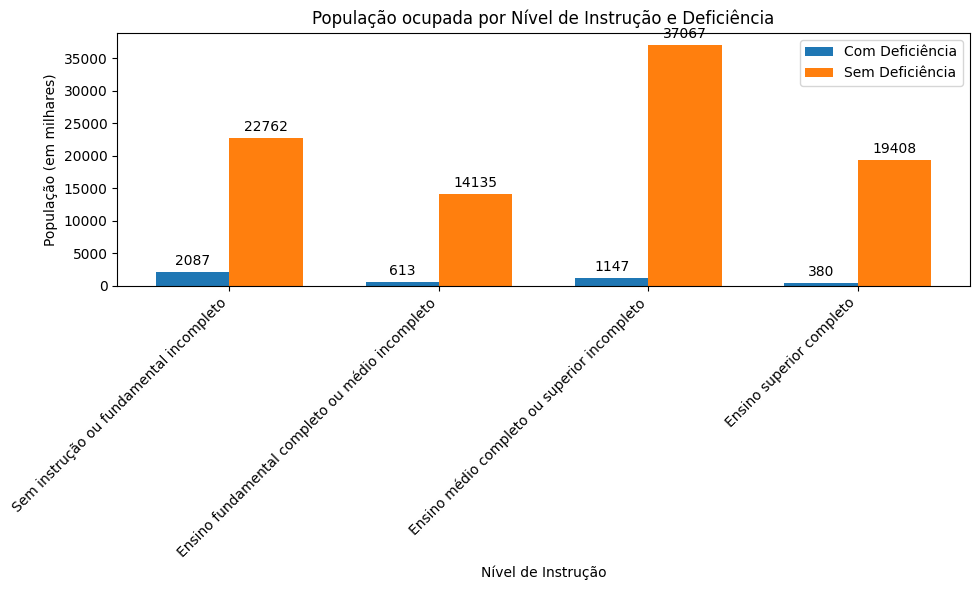

In [ ]:
# Definindo os dados
niveis_instrucao_2_ = ['Sem instrução ou fundamental incompleto', 'Ensino fundamental completo ou médio incompleto',
                    'Ensino médio completo ou superior incompleto', 'Ensino superior completo']
pop_com_deficiencia_2_ = [Sinstrucao_com_2_, EnsinoFund_com_2_, EnsinoMed_com_2_, EnsinoSup_com_2_]  # População com deficiência por nível de instrução
pop_sem_deficiencia_2_ = [Sinstrucao_sem_2_, EnsinoFund_sem_2_, EnsinoMed_sem_2_, EnsinoSup_sem_2_]  # População sem deficiência por nível de instrução

# Criando o índice para as barras
x_2_ = np.arange(len(niveis_instrucao_2_))

# Largura das barras
width_2_ = 0.35

# Criando o gráfico de barras
fig_2_, ax_2_ = plt.subplots(figsize=(10, 6))
barras_com_2_ = ax_2_.bar(x_2_ - width_2_/2, pop_com_deficiencia_2_, width_2_, label='Com Deficiência')
barras_sem_2_ = ax_2_.bar(x_2_ + width_2_/2, pop_sem_deficiencia_2_, width_2_, label='Sem Deficiência')

# Adicionando rótulos, título e legenda
ax_2_.set_xlabel('Nível de Instrução')
ax_2_.set_ylabel('População (em milhares)')
ax_2_.set_title('População ocupada por Nível de Instrução e Deficiência')
ax_2_.set_xticks(x_2_)
ax_2_.set_xticklabels(niveis_instrucao_2_, rotation=45, ha='right')
ax_2_.legend()

# Adicionando os valores em cima das barras
def autolabel(barras):
    for barra in barras:
        altura = barra.get_height()
        ax_2_.annotate('{}'.format(altura),
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barras_com_2_)
autolabel(barras_sem_2_)

plt.tight_layout()
plt.show()

#**População Desocupada**

######**GRUPO DE IDADE**

In [ ]:
# Obtendo os valores grupos de idade Com e Sem Deficiência
idade1_com_3_ = int(round(float(str(df.loc[df['Características selecionadas'] == '14 a 29 anos', 'População desocupada\r\n_Com deficiência'].values[0]).replace(" ", ""))))
idade2_com_3_ = int(round(float(str(df.loc[df['Características selecionadas'] == '30 a 49 anos', 'População desocupada\r\n_Com deficiência'].values[0]).replace(" ", ""))))
idade3_com_3_ = int(round(float(str(df.loc[df['Características selecionadas'] == '50 a 59 anos', 'População desocupada\r\n_Com deficiência'].values[0]).replace(" ", ""))))
idade4_com_3_ = int(round(float(str(df.loc[df['Características selecionadas'] == '60 anos ou mais', 'População desocupada\r\n_Com deficiência'].values[0]).replace(" ", ""))))
idade1_sem_3_ = int(round(float(str(df.loc[df['Características selecionadas'] == '14 a 29 anos', 'População desocupada\r\n_Sem deficiência'].values[0]).replace(" ", ""))))
idade2_sem_3_ = int(round(float(str(df.loc[df['Características selecionadas'] == '30 a 49 anos', 'População desocupada\r\n_Sem deficiência'].values[0]).replace(" ", ""))))
idade3_sem_3_ = int(round(float(str(df.loc[df['Características selecionadas'] == '50 a 59 anos', 'População desocupada\r\n_Sem deficiência'].values[0]).replace(" ", ""))))
idade4_sem_3_ = int(round(float(str(df.loc[df['Características selecionadas'] == '60 anos ou mais', 'População desocupada\r\n_Sem deficiência'].values[0]).replace(" ", ""))))

# Calculando a diferença numérica
diferenca_numerica_fisica_1__3_ = idade1_com_3_ - idade1_sem_3_
diferenca_numerica_fisica_2__3_ = idade2_com_3_ - idade2_sem_3_
diferenca_numerica_fisica_3__3_ = idade3_com_3_ - idade3_sem_3_
diferenca_numerica_fisica_4__3_ = idade2_com_3_ - idade4_sem_3_

# Exibindo os valores e a diferença numérica
print("{} população 14 a 29 anos possui deficiência e está desempregado.".format(idade1_com_3_))
print("{} população 30 a 49 anos possui deficiência e está desempregado.".format(idade2_com_3_))
print("{} população 50 a 59 anos possui deficiência e está desempregado.".format(idade3_com_3_))
print("{} população 60 anos ou mais possui deficiência e está desempregado.".format(idade4_com_3_))
print("{} população 14 a 29 anos possui deficiência e está desempregado.".format(idade1_sem_3_))
print("{} população 30 a 49 anos possui deficiência e está desempregado.".format(idade2_sem_3_))
print("{} população 50 a 59 anos possui deficiência e está desempregado.".format(idade3_sem_3_))
print("{} população 60 anos ou mais possui deficiência e está desempregado.".format(idade4_sem_3_))

print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 14 a 29 anos que estão desempregados é de {} ".format(diferenca_numerica_fisica_1__3_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 30 a 49 anos que estão desempregados é de {} ".format(diferenca_numerica_fisica_2__3_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 50 a 59 anos que estão desempregados é de {} ".format(diferenca_numerica_fisica_3__3_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 60 anos ou mais que estão desempregados é de {} ".format(diferenca_numerica_fisica_4__3_))

139 população 14 a 29 anos possui deficiência e está desempregado.
199 população 30 a 49 anos possui deficiência e está desempregado.
101 população 50 a 59 anos possui deficiência e está desempregado.
46 população 60 anos ou mais possui deficiência e está desempregado.
5302 população 14 a 29 anos possui deficiência e está desempregado.
3033 população 30 a 49 anos possui deficiência e está desempregado.
723 população 50 a 59 anos possui deficiência e está desempregado.
196 população 60 anos ou mais possui deficiência e está desempregado.
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 14 a 29 anos que estão desempregados é de -5163 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 30 a 49 anos que estão desempregados é de -2834 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de 50 a 59 anos que estão desempregados é de -622 
A diferença numérica entre pessoas com deficiência e pessoas sem defici

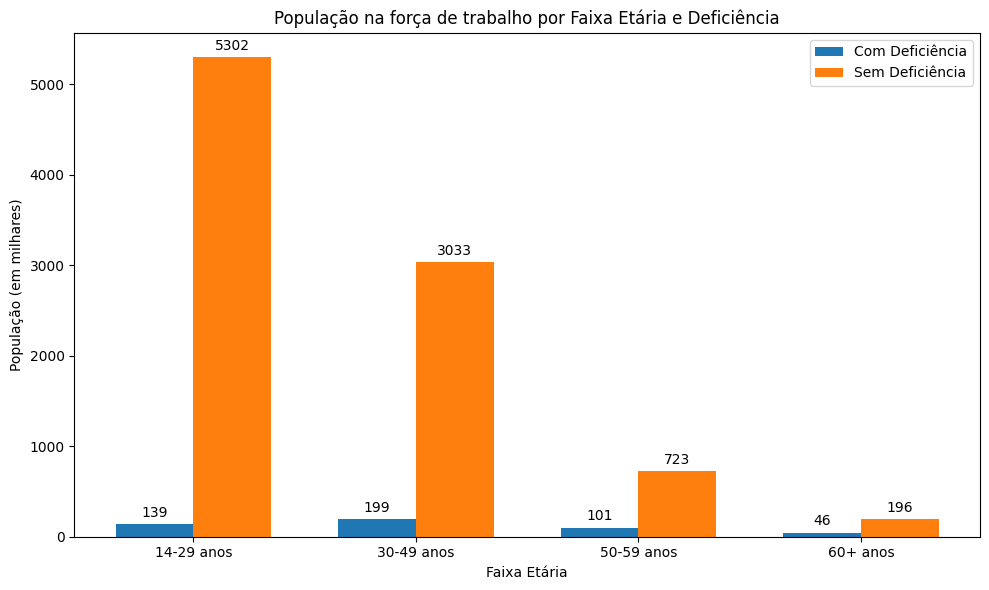

In [ ]:
# Definindo os dados
idades_3_ = ['14-29 anos', '30-49 anos', '50-59 anos', '60+ anos']  # Faixas etárias
pop_com_deficiencia_3_ = [idade1_com_3_, idade2_com_3_, idade3_com_3_, idade4_com_3_]  # População com deficiência por faixa etária
pop_sem_deficiencia_3_ = [idade1_sem_3_, idade2_sem_3_, idade3_sem_3_, idade4_sem_3_]  # População sem deficiência por faixa etária

# Criando o índice para as barras
x = np.arange(len(idades))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras_com = ax.bar(x - width/2, pop_com_deficiencia_3_, width, label='Com Deficiência')
barras_sem = ax.bar(x + width/2, pop_sem_deficiencia_3_, width, label='Sem Deficiência')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('População (em milhares)')
ax.set_title('População na força de trabalho por Faixa Etária e Deficiência')
ax.set_xticks(x)
ax.set_xticklabels(idades)
ax.legend()

# Adicionando os valores em cima das barras
def autolabel(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate('{}'.format(altura),
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barras_com)
autolabel(barras_sem)

plt.tight_layout()
plt.show()

######**NIVEL DE INSTRUÇÃO**

In [ ]:
# Obtendo os valores grupos de idade Com e Sem Deficiência
Sinstrucao_com_4_ = int(round(float(str(df.loc[df['Características selecionadas'] == 'Sem instrução ou fundamental incompleto', 'População desocupada\r\n_Com deficiência'].values[0]).replace(" ", ""))))
EnsinoFund_com_4_ = int(round(float(str(df.loc[df['Características selecionadas'] == 'Ensino fundamental completo ou médio incompleto', 'População desocupada\r\n_Com deficiência'].values[0]).replace(" ", ""))))
EnsinoMed_com_4_ = int(round(float(str(df.loc[df['Características selecionadas'] == 'Ensino médio completo ou superior incompleto', 'População desocupada\r\n_Com deficiência'].values[0]).replace(" ", ""))))
EnsinoSup_com_4_ = int(round(float(str(df.loc[df['Características selecionadas'] == 'Ensino superior completo', 'População desocupada\r\n_Com deficiência'].values[0]).replace(" ", ""))))
Sinstrucao_sem_4_ = int(round(float(str(df.loc[df['Características selecionadas'] == 'Sem instrução ou fundamental incompleto', 'População desocupada\r\n_Sem deficiência'].values[0]).replace(" ", ""))))
EnsinoFund_sem_4_ = int(round(float(str(df.loc[df['Características selecionadas'] == 'Ensino fundamental completo ou médio incompleto', 'População desocupada\r\n_Sem deficiência'].values[0]).replace(" ", ""))))
EnsinoMed_sem_4_ = int(round(float(str(df.loc[df['Características selecionadas'] == 'Ensino médio completo ou superior incompleto', 'População desocupada\r\n_Sem deficiência'].values[0]).replace(" ", ""))))
EnsinoSup_sem_4_ = int(round(float(str(df.loc[df['Características selecionadas'] == 'Ensino superior completo', 'População desocupada\r\n_Sem deficiência'].values[0]).replace(" ", ""))))

# Calculando a diferença numérica
diferenca_numerica_fisica_1_ = Sinstrucao_com_4_ - Sinstrucao_sem_4_
diferenca_numerica_fisica_2_ = EnsinoFund_com_4_ - EnsinoFund_sem_4_
diferenca_numerica_fisica_3_ = EnsinoMed_com_4_ - EnsinoMed_sem_4_
diferenca_numerica_fisica_4_ = EnsinoSup_com_4_ - EnsinoSup_sem_4_

# Exibindo os valores e a diferença numérica
print("{} população Sem instrução ou fundamental incompleto possui deficiência e está desempregado.".format(Sinstrucao_com_4_))
print("{} população Ensino fundamental completo ou médio incompleto possui deficiência e está desempregado.".format(EnsinoFund_com_4_))
print("{} população Ensino médio completo ou superior incompleto possui deficiência e está desempregado.".format(EnsinoMed_com_4_))
print("{} população Ensino superior completo possui deficiência e está desempregado.".format(EnsinoSup_com_4_))
print("{} população Sem instrução ou fundamental incompleto possui deficiência e está desempregado.".format(Sinstrucao_sem_4_))
print("{} população Ensino fundamental completo ou médio incompleto possui deficiência e desempregado.".format(EnsinoFund_sem_4_))
print("{} população Ensino médio completo ou superior incompleto possui deficiência e desempregado.".format(EnsinoMed_sem_4_))
print("{} população Ensino superior completo possui deficiência e desempregado.".format(EnsinoSup_sem_4_))

print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Sem instrução ou fundamental incompleto que estão desempregados é de {} ".format(diferenca_numerica_fisica_1_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino fundamental completo ou médio incompleto que estão desempregados é de {} ".format(diferenca_numerica_fisica_2_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino médio completo ou superior incompleto que estão desempregados é de {} ".format(diferenca_numerica_fisica_3_))
print("A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino superior completo que estão desempregados é de {} ".format(diferenca_numerica_fisica_4_))

190 população Sem instrução ou fundamental incompleto possui deficiência e está desempregado.
111 população Ensino fundamental completo ou médio incompleto possui deficiência e está desempregado.
166 população Ensino médio completo ou superior incompleto possui deficiência e está desempregado.
13 população Ensino superior completo possui deficiência e está desempregado.
1927 população Sem instrução ou fundamental incompleto possui deficiência e está desempregado.
2093 população Ensino fundamental completo ou médio incompleto possui deficiência e desempregado.
4220 população Ensino médio completo ou superior incompleto possui deficiência e desempregado.
909 população Ensino superior completo possui deficiência e desempregado.
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Sem instrução ou fundamental incompleto que estão desempregados é de -1737 
A diferença numérica entre pessoas com deficiência e pessoas sem deficiência de Ensino fundamental completo o

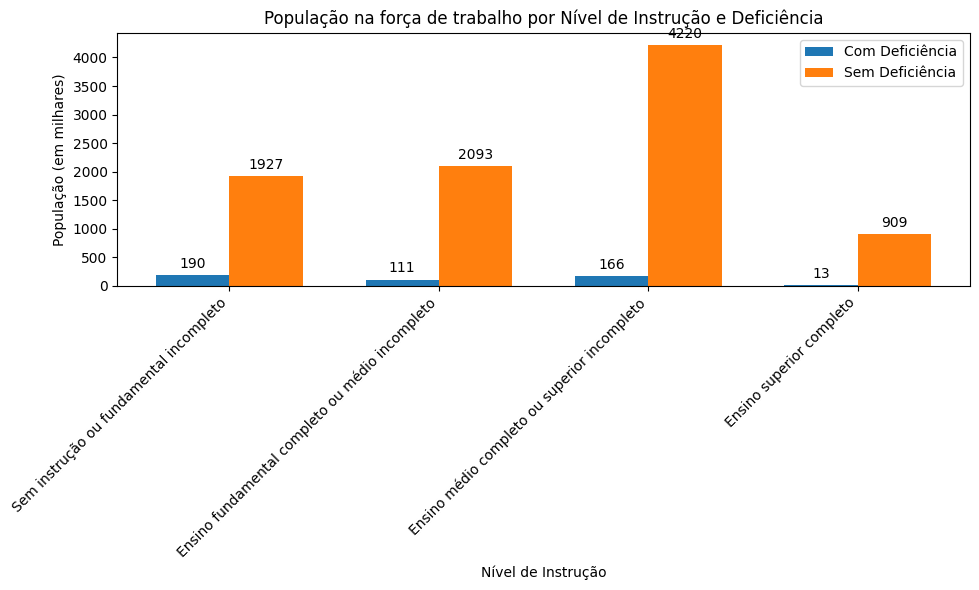

In [ ]:
# Definindo os dados
niveis_instrucao_4_ = ['Sem instrução ou fundamental incompleto', 'Ensino fundamental completo ou médio incompleto',
                    'Ensino médio completo ou superior incompleto', 'Ensino superior completo']
pop_com_deficiencia_4_ = [Sinstrucao_com_4_, EnsinoFund_com_4_, EnsinoMed_com_4_, EnsinoSup_com_4_]  # População com deficiência por nível de instrução
pop_sem_deficiencia_4_ = [Sinstrucao_sem_4_, EnsinoFund_sem_4_, EnsinoMed_sem_4_, EnsinoSup_sem_4_]  # População sem deficiência por nível de instrução

# Criando o índice para as barras
x_4_ = np.arange(len(niveis_instrucao_4_))

# Largura das barras
width_4_ = 0.35

# Criando o gráfico de barras
fig_4_, ax_4_ = plt.subplots(figsize=(10, 6))
barras_com_4_ = ax_4_.bar(x_4_ - width_4_/2, pop_com_deficiencia_4_, width_4_, label='Com Deficiência')
barras_sem_4_ = ax_4_.bar(x_4_ + width_4_/2, pop_sem_deficiencia_4_, width_4_, label='Sem Deficiência')

# Adicionando rótulos, título e legenda
ax_4_.set_xlabel('Nível de Instrução')
ax_4_.set_ylabel('População (em milhares)')
ax_4_.set_title('População na força de trabalho por Nível de Instrução e Deficiência')
ax_4_.set_xticks(x_4_)
ax_4_.set_xticklabels(niveis_instrucao_4_, rotation=45, ha='right')
ax_4_.legend()

# Adicionando os valores em cima das barras
def autolabel(barras):
    for barra in barras:
        altura = barra.get_height()
        ax_4_.annotate('{}'.format(altura),
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barras_com_4_)
autolabel(barras_sem_4_)

plt.tight_layout()
plt.show()

# *MATRIZ DE CORRELAÇÃO TABELA*

In [ ]:
print(df.columns)

Index(['Características selecionadas',
       'População em idade de trabalhar_Com deficiência',
       'População em idade de trabalhar_Sem deficiência',
       'População na força de trabalho_ Com deficiência',
       'População na força de trabalho_Sem deficiência',
       'População ocupada\r\n_Com deficiência',
       'População ocupada\r\n_Sem deficiência',
       'População ocupada em trabalhos formais_Com deficiência',
       'População ocupada em trabalhos formais_Sem deficiência',
       'População desocupada\r\n_Com deficiência',
       'População desocupada\r\n_Sem deficiência',
       'Taxa de participação _Com deficiência',
       'Taxa de participação _Sem deficiência',
       'Nível de ocupação_Com deficiência',
       'Nível de ocupação_Sem deficiência',
       'Taxa de formalização_Com deficiência',
       'Taxa de formalização_Sem deficiência',
       'Taxa de desocupação_Com deficiência',
       'Taxa de desocupação_Sem deficiência'],
      dtype='object')


) missing from current font.
  fig.canvas.draw()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


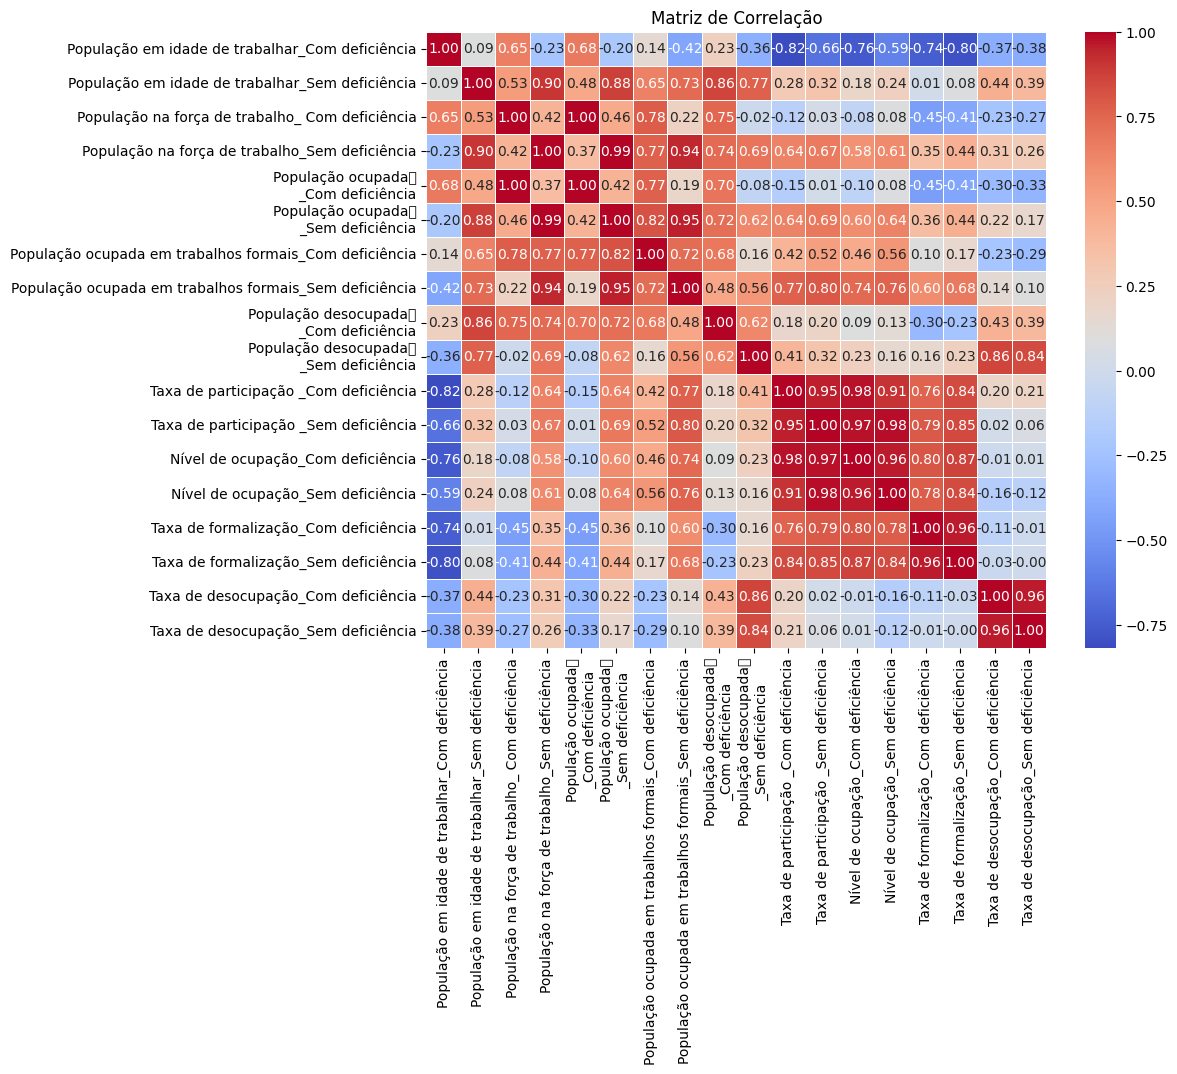

In [ ]:
# Selecionando algumas variáveis
variaveis_selecionadas_2_ = ['Características selecionadas',
       'População em idade de trabalhar_Com deficiência',
       'População em idade de trabalhar_Sem deficiência',
       'População na força de trabalho_ Com deficiência',
       'População na força de trabalho_Sem deficiência',
       'População ocupada\r\n_Com deficiência',
       'População ocupada\r\n_Sem deficiência',
       'População ocupada em trabalhos formais_Com deficiência',
       'População ocupada em trabalhos formais_Sem deficiência',
       'População desocupada\r\n_Com deficiência',
       'População desocupada\r\n_Sem deficiência',
       'Taxa de participação _Com deficiência',
       'Taxa de participação _Sem deficiência',
       'Nível de ocupação_Com deficiência',
       'Nível de ocupação_Sem deficiência',
       'Taxa de formalização_Com deficiência',
       'Taxa de formalização_Sem deficiência',
       'Taxa de desocupação_Com deficiência',
       'Taxa de desocupação_Sem deficiência']

# Filtrar o DataFrame excluindo a coluna 'Características selecionadas'
df_filtrado = df[variaveis_selecionadas_2_].drop(columns=['Características selecionadas'])

# Remover espaços em branco dos valores nas colunas do DataFrame
for coluna in df_filtrado.columns:
    if df_filtrado[coluna].dtype == 'object':
        df_filtrado[coluna] = df_filtrado[coluna].str.replace(" ", "").astype(float)

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtrado.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

# Criando modelo de previsão

In [ ]:
df.head(5)

,Características selecionadas,População em idade de trabalhar_Com deficiência,População em idade de trabalhar_Sem deficiência,População na força de trabalho_ Com deficiência,População na força de trabalho_Sem deficiência,População ocupada\r\n_Com deficiência,População ocupada\r\n_Sem deficiência,População ocupada em trabalhos formais_Com deficiência,População ocupada em trabalhos formais_Sem deficiência,População desocupada\r\n_Com deficiência,População desocupada\r\n_Sem deficiência,Taxa de participação _Com deficiência,Taxa de participação _Sem deficiência,Nível de ocupação_Com deficiência,Nível de ocupação_Sem deficiência,Taxa de formalização_Com deficiência,Taxa de formalização_Sem deficiência,Taxa de desocupação_Com deficiência,Taxa de desocupação_Sem deficiência
0,Grupos de idade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14 a 29 anos,1 371,47 341,536,29 229,397,23 927,141.0,11 929,139.0,5 302,39.1,61.7,29.0,50.5,35.4,49.9,25.9,18.1
2,30 a 49 anos,3 580,58 175,1 885,49 183,1 685,46 150,699.0,25 538,199.0,3 033,52.6,84.5,47.1,79.3,41.5,55.3,10.6,6.2
3,50 a 59 anos,3 189,23 522,1 382,16 680,1 281,15 957,409.0,7 678,101.0,723,43.3,70.9,40.2,67.8,31.9,48.1,7.3,4.3
4,60 anos ou mais,8 534,25 865,910,7 661,863,7 465,201.0,2 479,46.0,196,10.7,29.6,10.1,28.9,23.3,33.2,5.1,2.6


In [ ]:
colunas_numericas.head()

,População ocupada em trabalhos formais_Com deficiência,População desocupada\r\n_Com deficiência,Taxa de participação _Com deficiência,Taxa de participação _Sem deficiência,Nível de ocupação_Com deficiência,Nível de ocupação_Sem deficiência,Taxa de formalização_Com deficiência,Taxa de formalização_Sem deficiência,Taxa de desocupação_Com deficiência,Taxa de desocupação_Sem deficiência
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141.0,139.0,39.1,61.7,29.0,50.5,35.4,49.9,25.9,18.1
2,699.0,199.0,52.6,84.5,47.1,79.3,41.5,55.3,10.6,6.2
3,409.0,101.0,43.3,70.9,40.2,67.8,31.9,48.1,7.3,4.3
4,201.0,46.0,10.7,29.6,10.1,28.9,23.3,33.2,5.1,2.6


In [ ]:
colunas_numericas.dropna()

,População ocupada em trabalhos formais_Com deficiência,População desocupada\r\n_Com deficiência,Taxa de participação _Com deficiência,Taxa de participação _Sem deficiência,Nível de ocupação_Com deficiência,Nível de ocupação_Sem deficiência,Taxa de formalização_Com deficiência,Taxa de formalização_Sem deficiência,Taxa de desocupação_Com deficiência,Taxa de desocupação_Sem deficiência
1,141.0,139.0,39.1,61.7,29.0,50.5,35.4,49.9,25.9,18.1
2,699.0,199.0,52.6,84.5,47.1,79.3,41.5,55.3,10.6,6.2
3,409.0,101.0,43.3,70.9,40.2,67.8,31.9,48.1,7.3,4.3
4,201.0,46.0,10.7,29.6,10.1,28.9,23.3,33.2,5.1,2.6
6,444.0,190.0,20.3,52.9,18.6,48.8,21.3,29.7,8.3,7.8
7,213.0,111.0,39.1,59.4,33.1,51.7,34.8,41.1,15.3,12.9
8,553.0,166.0,48.2,77.1,42.1,69.2,48.2,57.8,12.7,10.2
9,239.0,13.0,48.0,83.7,46.5,79.9,63.1,70.2,3.3,4.5


In [ ]:
# Separando as colunas para o XGBOOST com hiperparêmetros
df_xgb_hiper= colunas_numericas
y_hiper = df_xgb_hiper['Taxa de formalização_Sem deficiência']
x_hiper = df_xgb_hiper.drop('Taxa de formalização_Sem deficiência', axis=1)
# Separando as informações do arquivo de dados em treino e teste
x_hiper_train, x_hiper_test, y_hiper_train, y_hiper_test = train_test_split(x_hiper, y_hiper, test_size=0.30, random_state=42)

In [ ]:
# Criando o objeto da regressão XGBOOST
xgb_hiper_regressor = XGBRegressor(objective='reg:squarederror',  # é uma regressão e modelo tentará minimizar o erro quadrático médio
                             n_estimators=100,  # Número de árvores
                                                # Atenção: um valor maior pode levar a um modelo mais complexo e pode exigir mais tempo de treinamento
                             learning_rate=0.1, # Taxa de aprendizado
                                                # A taxa de aprendizado controla a contribuição de cada árvore para as previsões finais.
                                                # Um valor mais baixo torna o modelo mais robusto, mas pode requerer mais árvores.
                                                # Um valor mais alto pode levar a um ajuste excessivo
                             max_depth=6, # Profundidade máxima da árvore: controla a profundidade máxima das árvores de decisão
                                          # Valores mais altos podem tornar o modelo mais complexo e propenso a overfitting,
                                          # enquanto valores mais baixos podem resultar em um modelo underfitting
                             subsample=0.8, # Fração das amostras usadas para treinamento de cada árvore
                             random_state=42)

# Verificar e substituir valores NaN
nan_count = np.isnan(y_hiper_train).sum()
if nan_count > 0:
    print(f"Número de valores NaN: {nan_count}")
    y_hiper_train = np.nan_to_num(y_hiper_train, nan=np.nanmean(y_hiper_train))

# Verificar e substituir valores infinitos
inf_count = np.isinf(y_hiper_train).sum()
if inf_count > 0:
    print(f"Número de valores infinitos: {inf_count}")
    y_hiper_train = np.where(np.isinf(y_hiper_train), np.nanmean(y_hiper_train[np.isfinite(y_hiper_train)]), y_hiper_train)

# Verificar valores mínimos e máximos
print(f"Valor mínimo: {y_hiper_train.min()}, Valor máximo: {y_hiper_train.max()}")

# Re-treinar o modelo
xgb_hiper_regressor.fit(x_hiper_train, y_hiper_train)

Número de valores NaN: 1
Valor mínimo: 29.7, Valor máximo: 70.2


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Utilizando o modelo nos dados de teste
xgb_hiper_result = xgb_hiper_regressor.predict(x_hiper_test)
xgb_hiper_result

array([54.128586, 40.38594 , 46.266666], dtype=float32)

In [ ]:
# Criando um dataframe com os valores do teste (reais) e da previsão (preditos)
xgb_hiper_regressor=pd.DataFrame({'Real': y_hiper_test, 'Predicted':xgb_hiper_result})

# Formatando os valores preditos
xgb_hiper_regressor['Predicted'] = round(xgb_hiper_regressor['Predicted'],3)

# Criando uma razão entre o valor predito e o real para saber o quanto está próximo ou não do real
xgb_hiper_regressor['Razao'] = round(xgb_hiper_regressor['Predicted']/xgb_hiper_regressor['Real'],3)

# Exibindo os dados
xgb_hiper_regressor.head(15)

,Real,Predicted,Razao
8,57.8,54.129002,0.936
1,49.9,40.386002,0.809
5,NaN,46.266998,NaN
